## Case Study: Stock Price Prediction 


<h4> The Case study is to predict Next day stock price [Adj Close Price] using  regression analysis</h4>
<p>
    We will be using Nifty 50 data for this case study<br>
    The filename '^NSEI.csv' contains the data<br>
    You need to generate  technical indicators as given below as  Features for converting Time Series to Supervised Learning Problem <br>
   <a href='https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/'> Convert time Series to Supervised Learning</a><p>
    <ul>
        <li> Moving Averages (Example Given : 3Period Moving Avearage (3MA)) </li>
        <li> Previous Day Returns </li>
        <li> Relative Stock returns </li>
    </ul>
<br>
Then you need to Train a Supervised learning algorithm and perform prediction.<br>
<a href='https://blog.quantinsti.com/random-forest-algorithm-in-python/'>Example for your Refrence </a><br>
<b> Make sure  to shift the feature by 1 period so that you will have data from t-1 period to predict price at t (look ahead bias) </b>

<strong> Please consider Testing Period after  01-01-2019 </strong>
</p>
<p>
    <b> Metrics for Evaluation </b>
    <ul>
        <li><strong> RMSE </strong></li>
     </ul>
</p>
<p> Some additional Documention for your help
    <ul>
        <li><a href='https://pandas.pydata.org/docs/'> Pandas Documentation </a> </li>
        <li><a href='https://scikit-learn.org/stable/'> Scikit Learn </a></li>
        </ul>
        </p>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, LSTM
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt
##### Import Other Required Library ###########

In [3]:
# Reading the Stock 
df=pd.read_csv("^NSEI.csv")

In [4]:
# Getting the head of the data
df.head()

Date         Open         High          Low        Close  \
0  2007-09-17  4518.450195  4549.049805  4482.850098  4494.649902   
1  2007-09-18  4494.100098  4551.799805  4481.549805  4546.200195   
2  2007-09-19  4550.250000  4739.000000  4550.250000  4732.350098   
3  2007-09-20  4734.850098  4760.850098  4721.149902  4747.549805   
4  2007-09-21  4752.950195  4855.700195  4733.700195  4837.549805   

     Adj Close  Volume  
0  4494.649902     0.0  
1  4546.200195     0.0  
2  4732.350098     0.0  
3  4747.549805     0.0  
4  4837.549805     0.0

In [5]:
# Selecting Adj Close
df=df[['Date','Adj Close']]
df = df.fillna(method='ffill')

In [6]:
df.head()

Date    Adj Close
0  2007-09-17  4494.649902
1  2007-09-18  4546.200195
2  2007-09-19  4732.350098
3  2007-09-20  4747.549805
4  2007-09-21  4837.549805

In [7]:
#### Generating a Sample Feature for your Reference 3period moving average
df['3MA']=df['Adj Close'].rolling(3).mean()
### shifting Feature 3MA  so that features at t-1 will be used to predict close at t
df['3MA']=df['3MA'].shift(1)

In [8]:
df.head()

Date    Adj Close          3MA
0  2007-09-17  4494.649902          NaN
1  2007-09-18  4546.200195          NaN
2  2007-09-19  4732.350098          NaN
3  2007-09-20  4747.549805  4591.066732
4  2007-09-21  4837.549805  4675.366699

In [9]:
# Generate More technical Features
df['Prev Day']=df['Adj Close'].shift(1)
df['Rel Return']=df['Adj Close'].pct_change().shift(1)

df1 = df.loc[3:].set_index("Date")
'''
plt.plot(df1['3MA'])
plt.plot(df1['Prev Day'])
plt.plot(df1['Rel Return'])
plt.legend()
'''

print(df1.head())






              Adj Close          3MA     Prev Day  Rel Return
Date                                                         
2007-09-20  4747.549805  4591.066732  4732.350098    0.040946
2007-09-21  4837.549805  4675.366699  4747.549805    0.003212
2007-09-24  4932.200195  4772.483236  4837.549805    0.018957
2007-09-25  4938.850098  4839.099935  4932.200195    0.019566
2007-09-26  4940.500000  4902.866699  4938.850098    0.001348


In [10]:
# Train Test Split  data (Make sure to consider the data is a time series data)
Standardisation = StandardScaler()

X_train = np.array(df1[df1.index < "2019-01-01"].drop(['Adj Close'],1))
#X_train = Standardisation.fit_transform(x_train) 
y_train = np.array(df1[df1.index < "2019-01-01"]['Adj Close'])
X_test = np.array(df1[df1.index >= "2019-01-01"].drop(['Adj Close'],1))
#X_test = Standardisation.fit_transform(x_test)
y_test = np.array(df1[df1.index >= "2019-01-01"]['Adj Close'])
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2784, 3) (284, 3)
(2784,) (284,)


In [29]:
# Train different Algorithms
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
print("lr confidence: ", lr_confidence)

model = RandomForestRegressor(n_estimators=1, max_depth=2, bootstrap=False, min_samples_leaf=1)
model.fit(X_train, y_train)


lr confidence:  0.9577067205106529


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Linear Regression RMSE 99.64836703014703
Random Forest RMSE 1217.0072034123077


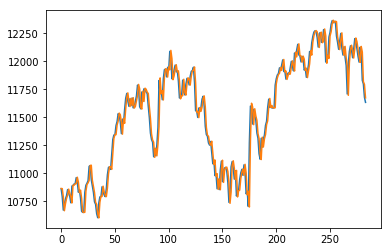

In [31]:
# Test performance of the model on the Testing Data using RMSE
print("Linear Regression RMSE",sqrt(mean_squared_error(y_test, lr.predict(X_test))))
print("Random Forest RMSE",sqrt(mean_squared_error(y_test, model.predict(X_test))))





plt.plot(y_test)
plt.plot(lr.predict(X_test))